<a href="https://colab.research.google.com/github/space-owner/Tensorflow-2/blob/main/Transfer%20Learning%20and%20Fine-Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Transfer learning and fine-tuning***
This post is **based on the Tensorflow tutorial** for study purposes. [Link](https://www.tensorflow.org/tutorials)   
If you get a chance, be sure to try the this tutorial.

In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

2.6.0


In [56]:
data_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"

download_path = tf.keras.utils.get_file(
    'cats_and_dogs.zip', origin=data_url, extract=True
)
print(">>> download_path =", download_path)

>>> download_path = /root/.keras/datasets/cats_and_dogs.zip


In [57]:
print(">>> download_list =", os.listdir(
    os.path.abspath(os.path.dirname(download_path)))
)

>>> download_list = ['cats_and_dogs_filtered', 'cats_and_dogs.zip', 'cats_and_dogs.zip.tar.gz']


In [58]:
data_path = os.path.join(
    os.path.dirname(download_path), "cats_and_dogs_filtered"
)
print(">>> data_path =", data_path)

>>> data_path = /root/.keras/datasets/cats_and_dogs_filtered


In [ ]:
print(">>> dir_in_data_path =", os.listdir(data_path))

>>> dir_in_data_path = ['vectorize.py', 'train', 'validation']


In [ ]:
train_dir = os.path.join(data_path, "train")
print(">>> train_dir =", train_dir)

val_dir = os.path.join(data_path, "validation")
print(">>> val_dir =", val_dir)

>>> train_dir = /root/.keras/datasets/cats_and_dogs_filtered/train
>>> val_dir = /root/.keras/datasets/cats_and_dogs_filtered/validation


In [59]:
batch_size = 32
image_size = (160, 160)

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, shuffle=True, batch_size=batch_size, image_size=image_size
)
print(">>> train_shape = ", train_dataset)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir, shuffle=True, batch_size=batch_size, image_size=image_size
)
print(">>> val_shape = ", val_dataset)

Found 2000 files belonging to 2 classes.
>>> train_shape =  <BatchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int32)>
Found 1000 files belonging to 2 classes.
>>> val_shape =  <BatchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int32)>


>>> class_names = ['cats', 'dogs']


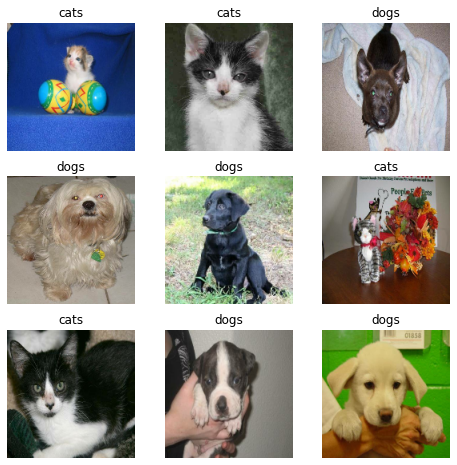

In [64]:
class_names = train_dataset.class_names
print(">>> class_names =", class_names)

plt.figure(figsize=(8, 8))
for image, label in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [65]:
val_batches = tf.data.experimental.cardinality(val_dataset)
print(val_batches)

tf.Tensor(32, shape=(), dtype=int64)
